# Projet de Data Mining (Iris clustering)
**Auteurs**: Yahya Lazrek et Hamza Ouabiba

**Date**: 26/01/2025

In [1]:
import pandas as pd
import numpy as np

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pd.read_csv(url, names=names)

print("Dimensions du dataset:", dataset.shape)
dataset.head()

Dimensions du dataset: (150, 5)


,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## 2. Prétraitement des Données

In [3]:
print("Valeurs manquantes par colonne:")
print(dataset.isnull().sum())

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset['class'] = le.fit_transform(dataset['class'])

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(dataset.iloc[:, :-1])
y = dataset.iloc[:, -1]

Valeurs manquantes par colonne:
sepal-length    0
sepal-width     0
petal-length    0
petal-width     0
class           0
dtype: int64


## 3. Sélection de Features

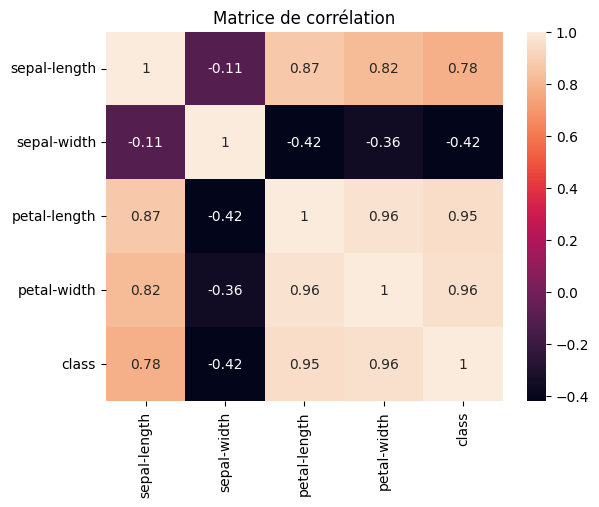

Features sélectionnées: ['petal-length' 'petal-width']


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = dataset.corr()
sns.heatmap(corr_matrix, annot=True)
plt.title("Matrice de corrélation")
plt.show()

from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(score_func=f_classif, k=2)
X_new = selector.fit_transform(X, y)
print("Features sélectionnées:", np.array(names[:-1])[selector.get_support()])

## 4. Data Mining (K-Means)

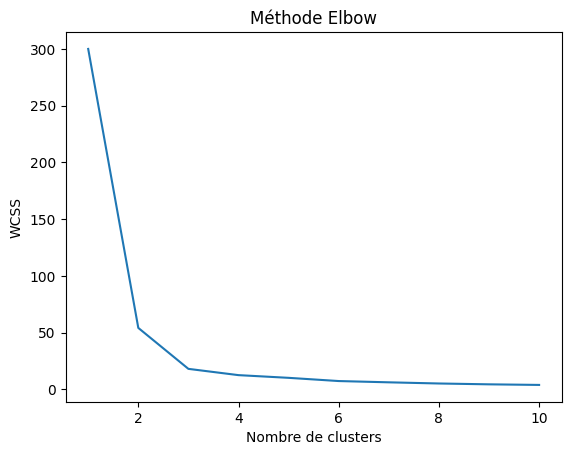

In [6]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_new)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Méthode Elbow')
plt.xlabel('Nombre de clusters')
plt.ylabel('WCSS')
plt.show()

kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(X_new)

## 5. Évaluation des Résultats

Score de silhouette: 0.67
Adjusted Rand Index: 0.89


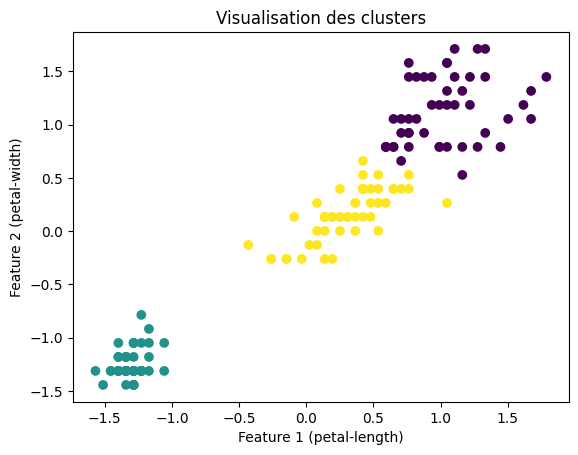

In [8]:
from sklearn.metrics import silhouette_score, adjusted_rand_score

silhouette = silhouette_score(X_new, clusters)
print(f"Score de silhouette: {silhouette:.2f}")

ari = adjusted_rand_score(y, clusters)
print(f"Adjusted Rand Index: {ari:.2f}")

plt.scatter(X_new[:,0], X_new[:,1], c=clusters, cmap='viridis')
plt.title('Visualisation des clusters')
plt.xlabel('Feature 1 (petal-length)')
plt.ylabel('Feature 2 (petal-width)')
plt.show()

## 6. Conclusion
- **Score de silhouette:** 0.67 (indique une bonne séparation des clusters).
- **Adjusted Rand Index:** 0.89 (indique une forte correspondance avec les vraies classes).
- Les features sélectionnées (`petal-length` et `petal-width`) sont les plus pertinentes pour le clustering.
- Le nombre optimal de clusters est **3**, comme déterminé par la méthode Elbow.